In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
# helper function

def create_catplot(df,query,x,y,hue,col):
    
    g = sns.catplot(
        data=df.query(query),
        x=x, y=y, hue=hue, col=col, kind="point",
        height=3.5, aspect=1.5, legend_out=True, sharey=False
    )

    g.map(lambda color: plt.grid(True))
    g.set_ylabels(y.upper())

# Quadro P6000 benchmark

In [3]:
quadro = pd.read_csv('quadro_p6000_benchmark.csv')

## Number of frames impacts speed

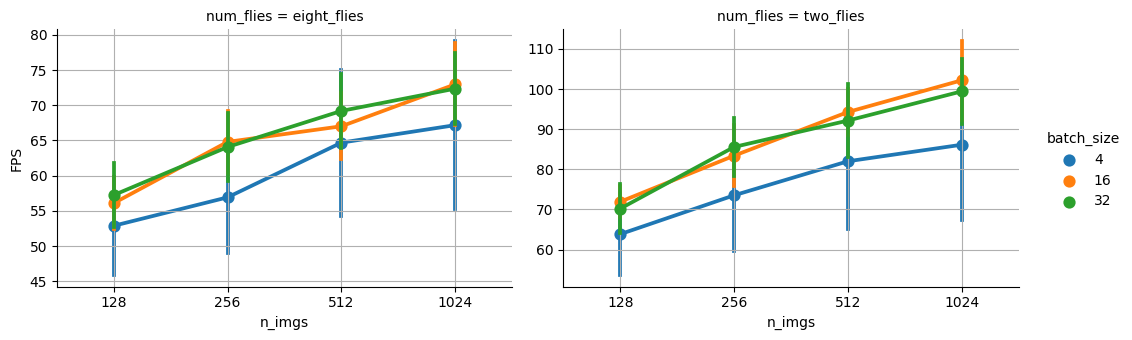

In [4]:
create_catplot(
    df=quadro,
    query="precision in ['None', 'FP32']",
    x="n_imgs",
    y="fps",
    hue="batch_size",
    col="num_flies")

## TensorRT does offer speed increase

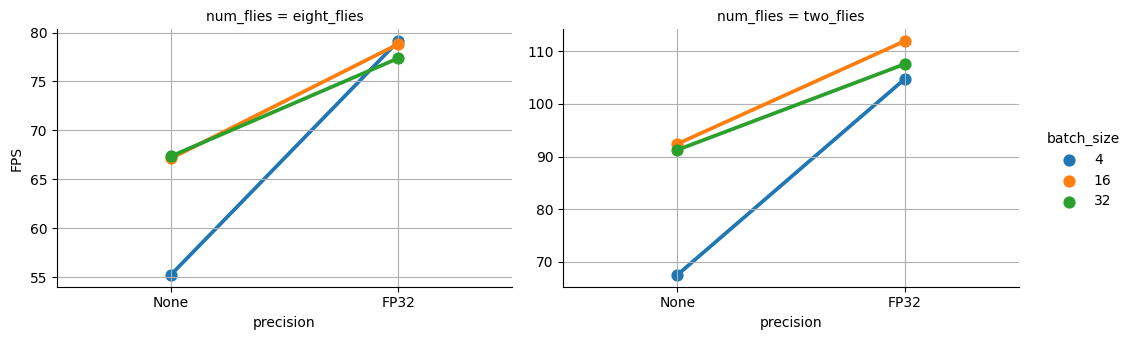

In [5]:
create_catplot(
    df=quadro,
    query="n_imgs == 1024",
    x="precision",
    y="fps",
    hue="batch_size",
    col="num_flies")

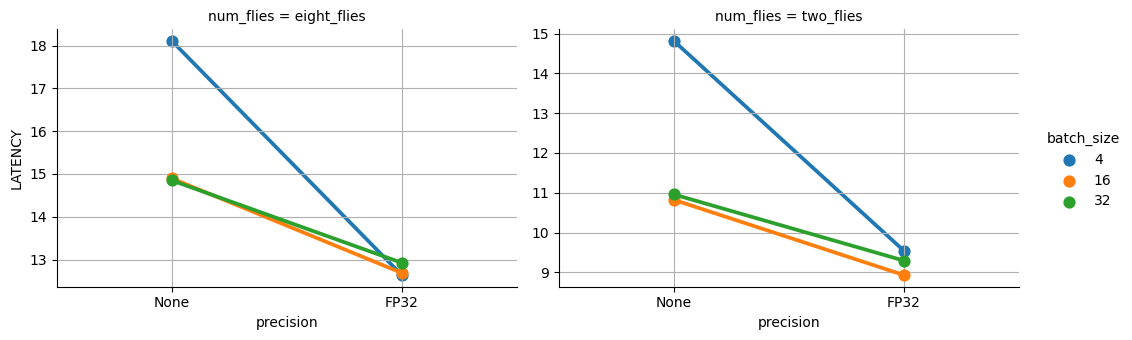

In [6]:
create_catplot(
    df=quadro,
    query="n_imgs == 1024",
    x="precision",
    y="latency",
    hue="batch_size",
    col="num_flies")

## Even at lower frame counts - but this doesn't consider conversion time...

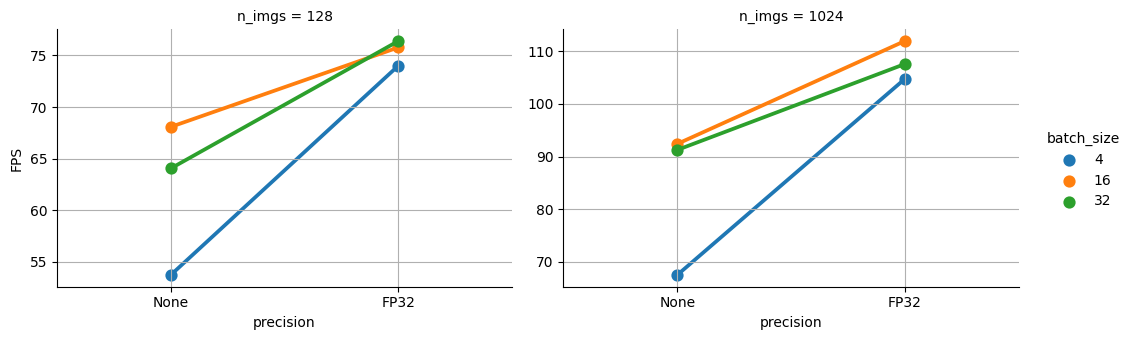

In [16]:
create_catplot(
    df=quadro,
    query="num_flies == 'two_flies' & n_imgs != 256 & n_imgs != 512",
    x="precision",
    y="fps",
    hue="batch_size",
    col="n_imgs")

# RTX A5000 benchmark

In [7]:
rtx = pd.read_csv('rtx_a5000_benchmark.csv')

## Further performance gains on better hardware 

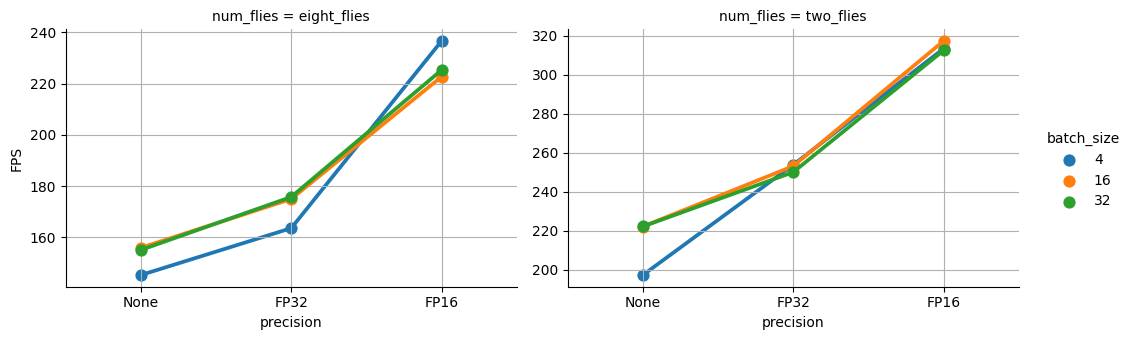

In [8]:
create_catplot(
    df=rtx,
    query="n_imgs == 1024",
    x="precision",
    y="fps",
    hue="batch_size",
    col="num_flies")

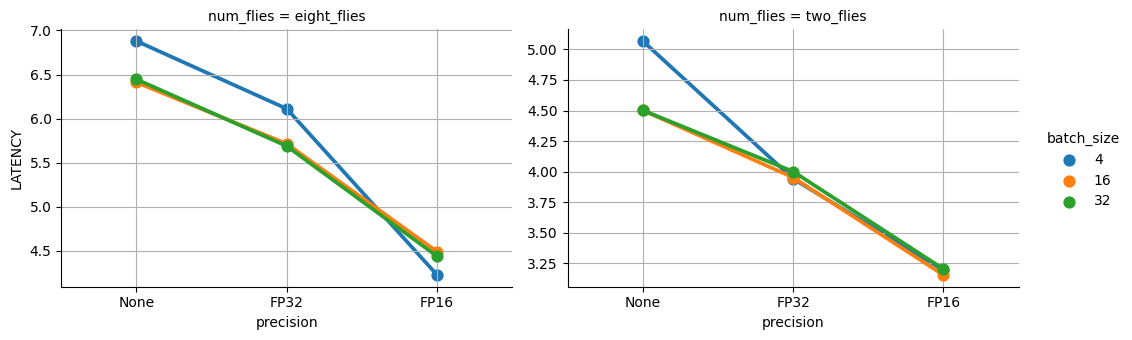

In [9]:
create_catplot(
    df=rtx,
    query="n_imgs == 1024",
    x="precision",
    y="latency",
    hue="batch_size",
    col="num_flies")

# Comparing GPUs

In [10]:
quadro['GPU'] = 'quadro_p6000'
rtx['GPU'] = 'rtx_a5000'

combined = pd.concat([quadro, rtx]).reset_index(drop=True)

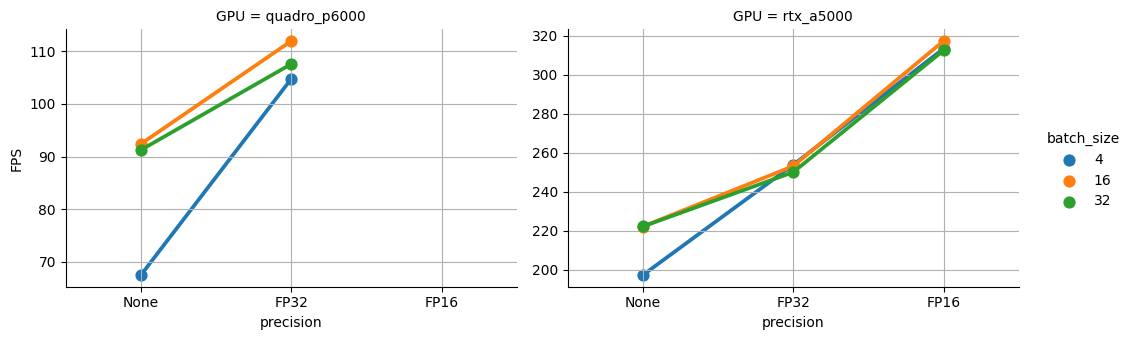

In [11]:
create_catplot(
    df=combined,
    query="n_imgs == 1024 & num_flies == 'two_flies'",
    x="precision",
    y="fps",
    hue="batch_size",
    col="GPU")

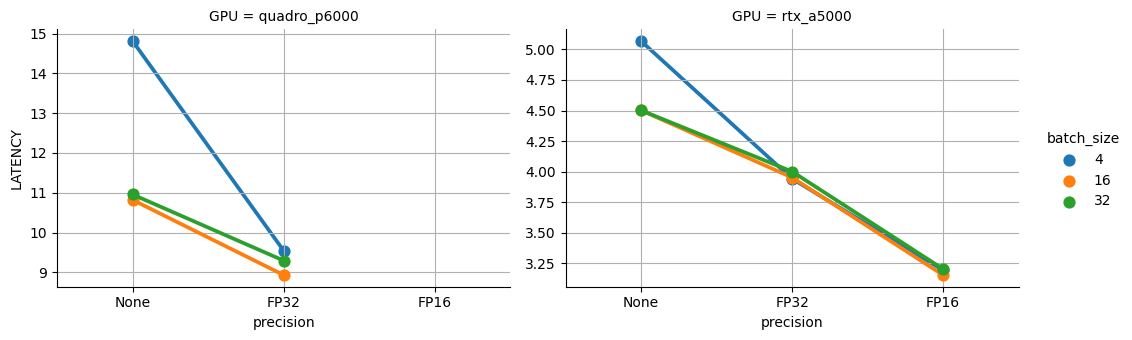

In [12]:
create_catplot(
    df=combined,
    query="n_imgs == 1024 & num_flies == 'two_flies'",
    x="precision",
    y="latency",
    hue="batch_size",
    col="GPU")